In [47]:
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.clustering import GaussianMixture
from pyspark.mllib.clustering import LDA, LDAModel
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark import SparkContext
from numpy import array
from math import sqrt
from pyspark.ml.pipeline import Pipeline
import pandas as pd
import sys
import pyspark


file = "data/0.feat"

data = sc.textFile(file)
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

clusters = KMeans.train(parsedData, 6, maxIterations=20, runs=30,  initializationMode="k-means||")

vecAssembler = VectorAssembler(inputCols=[], outputCol="features")
scaler = StandardScaler(withMean=True, withStd=True, inputCol="features", outputCol="scaled_features")
firstPipeline = Pipeline(stages=[vecAssembler, clusters])

centroids = clusters.centers
weights = clusters.k
cost = clusters.computeCost(parsedData)

f = open("clustered-data.txt", "w")
f.write( str(all_clusters)) 
f.close()

def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

gmm = GaussianMixture.train(parsedData, 6)
for i in range(2):
   print ("weight = ", gmm.weights[i], "mu = ", gmm.gaussians[i].mu,
       "sigma = ", gmm.gaussians[i].sigma.toArray())
    
    
#corpus = parsedDataForLDA.zipWithIndex().map(lambda x: [x[1], x[0]]).cache()



%matplotlib inline
import ggplot as gg





Within Set Sum of Squared Error = 5160.306877519752
weight =  0.166666666667 mu =  [174.0,0.0115273775216,0.0230547550432,0.0172910662824,0.0201729106628,0.028818443804,0.0259365994236,0.0518731988473,0.103746397695,0.00576368876081,0.00576368876081,0.00864553314121,0.00576368876081,0.00576368876081,0.028818443804,0.219020172911,0.00864553314121,0.0201729106628,0.00576368876081,0.00864553314121,0.014409221902,0.0115273775216,0.0201729106628,0.0403458213256,0.00576368876081,0.00576368876081,0.00576368876081,0.00576368876081,0.00864553314121,0.00576368876081,0.00576368876081,0.00576368876081,0.00864553314121,0.00576368876081,0.014409221902,0.00576368876081,0.0230547550432,0.00576368876081,0.00576368876081,0.0230547550432,0.0403458213256,0.0115273775216,0.00576368876081,0.00864553314121,0.0172910662824,0.0172910662824,0.0345821325648,0.00576368876081,0.0230547550432,0.00576368876081,0.0115273775216,0.440922190202,0.00864553314121,0.0489913544669,0.671469740634,0.233429394813,0.60806916426

/home/vagrant/.miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/vagrant/.miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


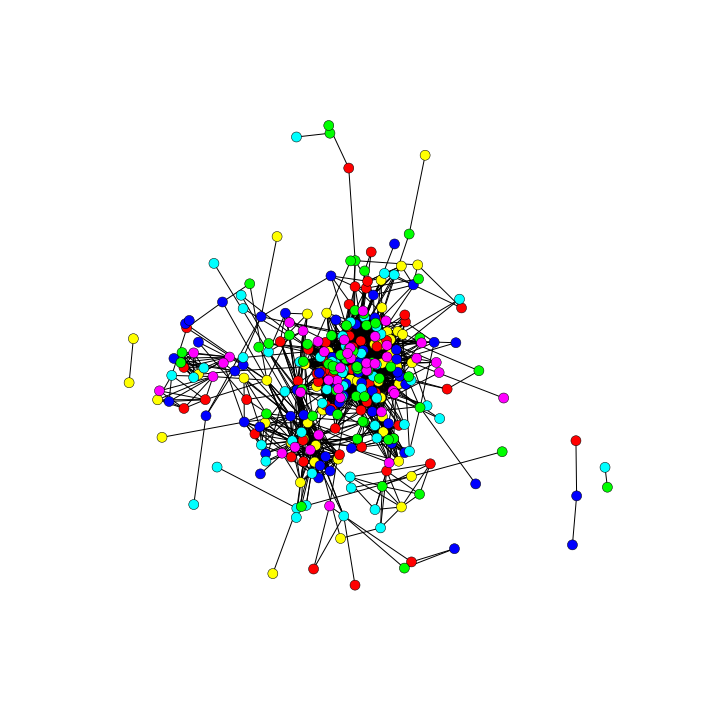

{0: 58, 1: 59, 2: 57, 3: 59, 4: 58, 5: 56}


In [73]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import colorsys
import matplotlib.pylab as pylab
import glob

pylab.rcParams['figure.figsize'] = 12, 12  

def rgb_to_hex(rgb):
    return '#' + ''.join(['%02x' % int(p * 255) for p in rgb])

def get_colours(count):
    count = count + 1
    colours = [colorsys.hsv_to_rgb(h / count, 1, 1) for h in range(count)]
    return [rgb_to_hex(c) for c in colours]

def draw_graph(graph, clusters):
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
    G=nx.Graph()
    for node in nodes:
        G.add_node(node)
    for edge in graph:
        G.add_edge(edge[0], edge[1])
    pos = nx.spring_layout(G, k=0.04, iterations=10)
    
    rainbow = get_colours(max(clusters))
    colours = ['r' for n in G.nodes()]
    for i in range(len(G.nodes())):
        colours[i] = rainbow[clusters[i]]
        
    nx.draw_networkx(G,
                     pos,
                     node_size=100,
                     linewidths=0.5,
                     with_labels=False,
                     node_color=colours) 
    
    plt.axis("off")
    plt.show()

def read_file(name):
    with open(name, "r") as f:
        return[list(map(int, line.split())) for line in f.readlines()]

all_clusters = clusters.predict(parsedData).collect() 
#gmm.predict(parsedData).collect()
#print(all_clusters[1:255])
#graph = [(20, 21),(21, 22),(22, 23), (23, 24),(24, 25), (25, 20), (27, 29)]
#print(all_clusters)
#draw_graph(graph)
draw_graph(read_file("data/0.edges"), all_clusters) 
cluster_counts = {}
for a in all_clusters:
    if a in cluster_counts:
        cluster_counts[a] = cluster_counts[a] + 1
    else:
        cluster_counts[a] = 1
    
print(cluster_counts)

